# Modelo de usuarios casuales

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("data/procesados_casual.pkl")
df.head(1)

,fecha,estacion,año,mes,festivo,dia_semana,clima,temperatura,sensacion_termica,humedad,viento,casual,casual_box,laboral_no,laboral_sí
0,2018-01-01,0.0,0,0,0,1.0,1,-0.82907,-0.67864,1.268831,-0.212121,331,16.39782,1.0,0.0


In [3]:
df.drop(["fecha", "casual_box"], axis = 1, inplace = True)

In [4]:
# Separamos en X e y.
X = df.drop("casual", axis = 1)
y = df["casual"]

In [5]:
# Separamos en train y test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    """
Esta función nos saca las métricas de nuestro modelo a predecir.
Args: 
    y_test(serie): los datos que tenemos.
    y_train(serie): los datos que ha predicho.
    y_test_pred(serie): los datos que tenemos.
    y_train_pred(serie): los datos que ha predicho.
    tipo_modelo(string): nombre que le damos a nuestro modelo.
Returns: devuelve un dataframe con las métricas.
    """   
    resultados = {"MAE": [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                "MSE": [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                "RMSE": [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                "R2":  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

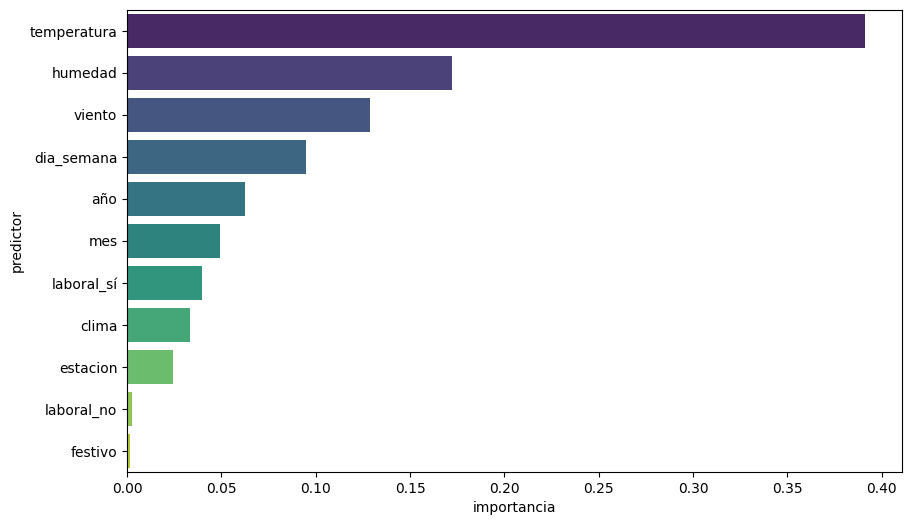

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [7]:
parametros9 = {"max_depth": [6], # tiene 23 de profundidad, así que ponemos como máximo la mitad. 
        "max_features": [11], # la raíz cuadrada es 3.3, así que dejamos hasta 4.
        # hemos tenido en cuenta el nº de filas que tenemos en nuestro conjunto de datos para los siguientes.
        "min_samples_split": [7, 8, 9, 10, 15, 20],
        "min_samples_leaf": [5, 6, 7, 8]}

In [8]:
gs_rf7 = GridSearchCV(
            estimator = RandomForestRegressor(), 
            param_grid = parametros9, 
            cv = 10,  
            verbose = 0, 
            return_train_score = True, 
            scoring = "neg_mean_squared_error")

In [9]:
gs_rf7.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6], 'max_features': [11],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [7, 8, 9, 10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [11]:
bosque = gs_rf7.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=11, min_samples_leaf=6,
                      min_samples_split=15)

In [86]:
y_pred_test_rf9 = bosque.predict(x_test)
y_pred_train_rf9 = bosque.predict(x_train)

In [12]:
with open ('modelo_casual.pkl','wb') as f:
    pickle.dump(bosque,f)

In [87]:
df_resultados9 = metricas(y_test, y_train, y_pred_test_rf9, y_pred_train_rf9, "Random Forest IV")
df_resultados9

,MAE,MSE,RMSE,R2,set,modelo
0,289.780249,170846.936662,413.336348,0.644383,test,Random Forest IV
1,275.873064,154069.519391,392.516903,0.670585,train,Random Forest IV
